# Flower Iris dataset

## 1. Importing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
for dirname, _, filenames in os.walk("../data"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\database.sqlite
../data\Iris.csv


In [3]:
df = pd.read_csv("../data/Iris.csv")

## 2. Exploratory data analysis (EDA)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.duplicated().sum()

0

In [10]:
print("Total number of null/missing values in each column of the (iris dataset) \n", df.isnull().sum())

Total number of null/missing values in each column of the (iris dataset) 
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [11]:
print("Percentage of the null/missing values in each column of the (iris dataset) \n", round(df.isnull().sum() / df.shape[0] * 100))

Percentage of the null/missing values in each column of the (iris dataset) 
 Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64


In [12]:
df.drop("Id", axis=1, inplace=True)

### 2.1 Visualizations

In [13]:
sns.set_style("dark")

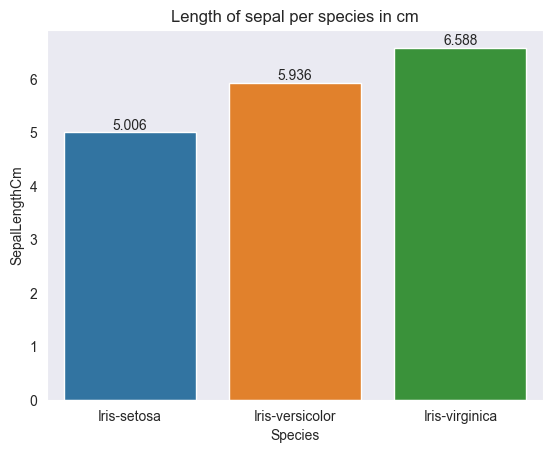

In [14]:
ax= sns.barplot(x=df["Species"], y=df["SepalLengthCm"], errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Length of sepal per species in cm")
plt.show()

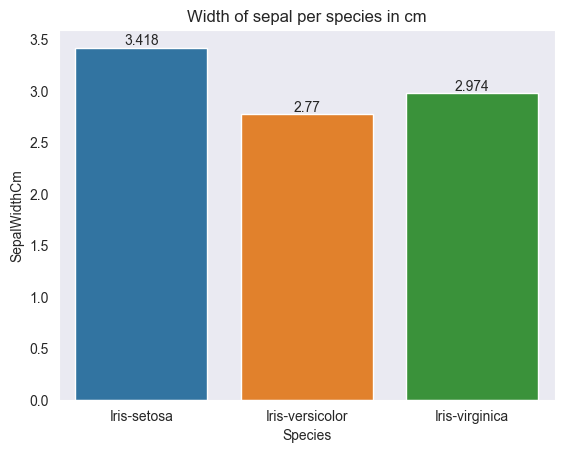

In [15]:
ax= sns.barplot(x=df["Species"], y=df["SepalWidthCm"], errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Width of sepal per species in cm")
plt.show()

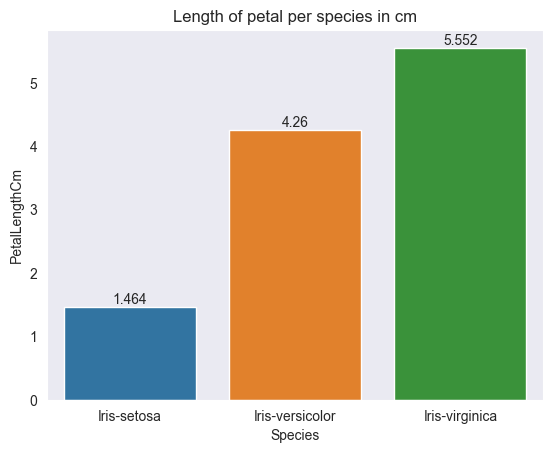

In [16]:
ax= sns.barplot(x=df["Species"], y=df["PetalLengthCm"], errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Length of petal per species in cm")
plt.show()

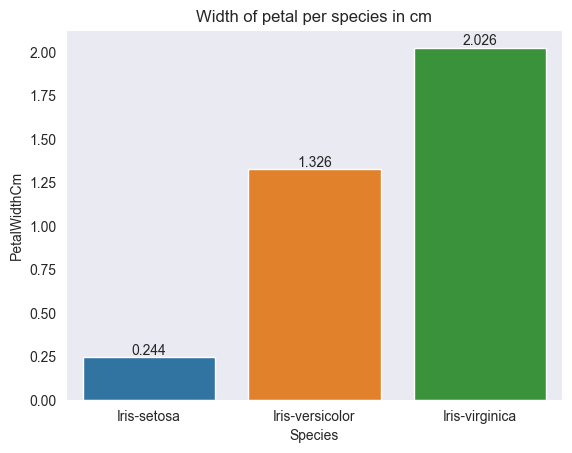

In [17]:
ax= sns.barplot(x=df["Species"], y=df["PetalWidthCm"], errorbar=None)
ax.bar_label(ax.containers[0])
plt.title("Width of petal per species in cm")
plt.show()

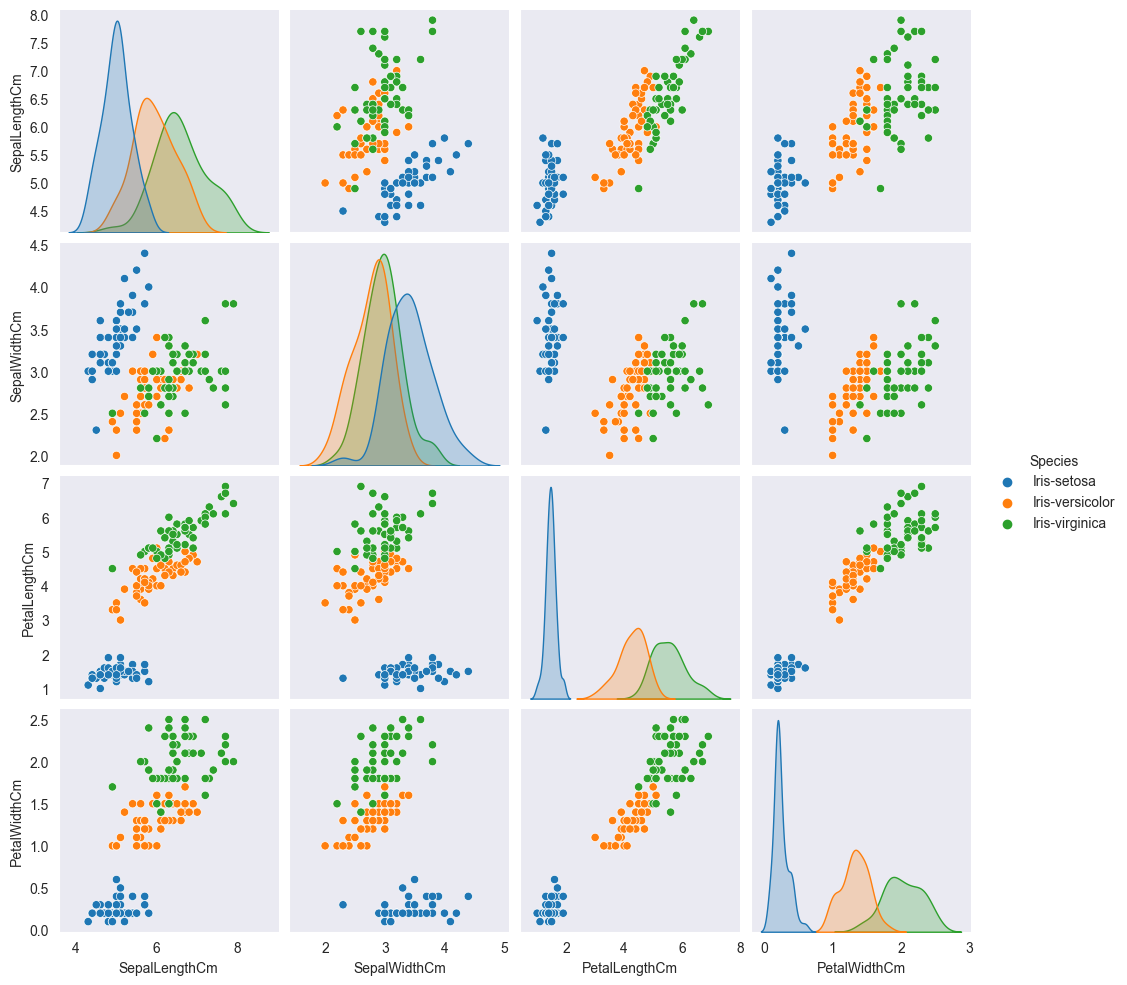

In [18]:
sns.pairplot(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']], hue='Species')

In [19]:
corr= df.corr(numeric_only=True)
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


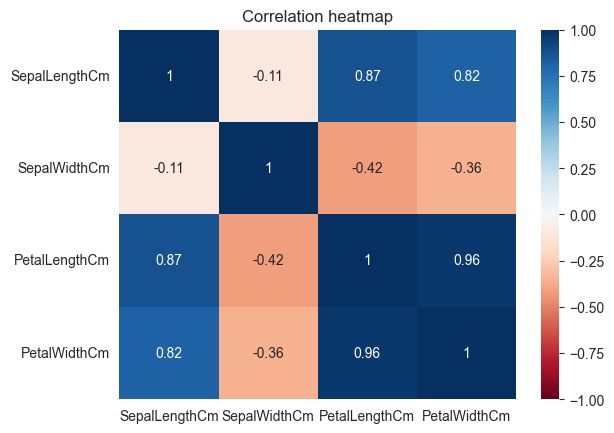

In [20]:
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True) # vmin: minimum value / vmax: maximum value
plt.title("Correlation heatmap")
plt.show()

## 3. Classification Model

### 3.1 Multiclass Classification

This type of classification is chosen since when trying to predict what species the iris of the flower is, it falls into 3 different species and not 2.

If it were to fall between 2 species we could use a binary classification algorithm such as logistic regression.

Binary Classification: tries to classify only in (n=2) classes of 1 label.

Multiclass Classification: tries to classify into (n>2) classes of 1 label.

Multilabel Classification: It is where the instances can belong to several instances at the same time (n>2) classes of (n>2) labels.


In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# Separate the target variable from the features
y = df["Species"] # target
X = df.drop("Species", axis=1) # features

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [28]:
predictions = clf.predict(X_test)

In [29]:
print(f"The model had a precision of: {accuracy_score(y_test, predictions)}")

The model had a precision of: 0.9777777777777777


In [30]:
cm = confusion_matrix(y_test, predictions)
print("Iris confusion matrix: \n",cm)

Iris confusion matrix: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


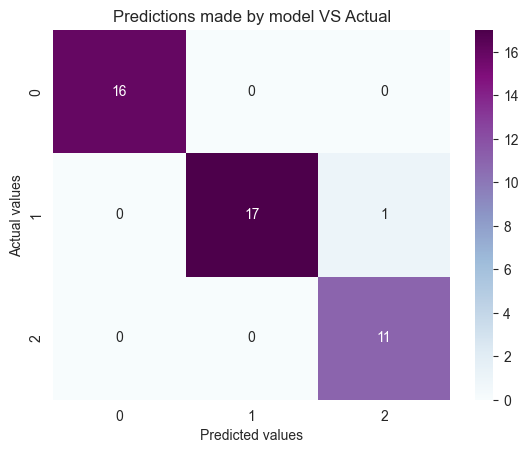

In [31]:
sns.heatmap(cm, cmap="BuPu", annot=True)
plt.title("Predictions made by model VS Actual")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.show()